# Stock Volatility Prediction and Portfolio Optimization

### 1. Title of the project

**Stock Volatility Prediction and Portfolio Optimization using Machine Learning and Financial Models**

---

### 2. Name

My full name as registered at the university: **Abdurahim Ahnish**  

---

### 3. Short description of the context of the project

In the financial world, stock volatility is a key metric that measures the risk associated with a specific stock or portfolio. Predicting stock volatility can help investors make informed decisions about which stocks to buy or sell. This project aims to predict the volatility of several key stocks, including **Apple (AAPL), Tesla (TSLA), Microsoft (MSFT), and Amazon (AMZN)**. Using these predictions, the project will optimize a stock portfolio to minimize risk and maximize returns based on **Markowitz’s Modern Portfolio Theory**.

---

### 4. Short description of the problem to solve

The main problem to solve in this project is how to accurately predict the future volatility of stocks and use this information to create an optimized stock portfolio. Stock prices are inherently volatile, and predicting future movements is challenging. Furthermore, once the volatility is predicted, the challenge is to construct a portfolio that balances risk and return effectively.

---

### 5. Short description of the ideas to solve the problems

The project will solve these problems using machine learning and statistical models:

1. **Volatility Prediction**: Use historical stock data to predict future volatility using models such as **ARIMA** (AutoRegressive Integrated Moving Average) for time series prediction.
2. **Portfolio Optimization**: Once the volatility is predicted, the project will use **Markowitz’s Portfolio Optimization theory** to find the optimal mix of stocks that minimizes risk (volatility) while maximizing expected returns.
3. **Data Visualization**: The project will visualize the predicted volatility and the optimized portfolio through graphs to better understand risk-return trade-offs.

---

### 6. Plan to solve the problem and potential issues

#### Plan:

1. **Data Collection**: Use `yfinance` to collect historical stock data for Apple, Tesla, Microsoft, and Amazon.
2. **Data Preprocessing**: Clean and prepare the data, calculating daily returns and volatility.
3. **Visualization**: Plot the results, including stock price trends, volatility predictions, and the efficient frontier of the portfolio.
4. **Volatility Prediction**: Implement machine learning models like ARIMA to predict the volatility of each stock.
5. **Portfolio Optimization**: Use `cvxpy` to implement **Markowitz’s theory** and calculate the optimal stock allocation.
6. **Automation**: Automate the process to download data, run predictions, and output results seamlessly.

#### Potential Issues:

- **Model overfitting or underfitting** in volatility predictions.
- **Inaccurate stock predictions** due to market noise or external factors.
- **Balancing the trade-off** between risk and return in the portfolio optimization.

# Stock Volatility Prediction and Portfolio Optimization

This project aims to predict the **volatility of selected stocks** and to optimize a **stock portfolio** to balance risk and return. The selected stocks are:
- Apple (AAPL)
- Tesla (TSLA)
- Microsoft (MSFT)
- Amazon (AMZN)

## Objectives

1. Predict the volatility of selected stocks.
2. Use Markowitz's Portfolio Theory to optimize the stock portfolio allocation.


## 1. Data Collection


## Data Collection

We use the `yfinance` library to retrieve historical data on selected stocks. The **Adjusted Close Price** is used because it accounts for dividends, stock splits, and other corporate actions that affect stock price.

### Selected Stocks
- **AAPL** (Apple)
- **TSLA** (Tesla)
- **MSFT** (Microsoft)
- **AMZN** (Amazon)

### Code for Data Collection

The code below downloads the adjusted closing prices for each stock over the past 5 years.


### Displaying Data

The output below shows the first few rows of the downloaded stock data, where each column represents the **Adjusted Close Price** for one of the selected stocks.

In [23]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  # Import datetime to use datetime.today()

# Define stock symbols and dates for data collection
symbols = ["AAPL", "TSLA", "MSFT", "AMZN"]
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Function to download stock data for each symbol with progress messages disabled
def download_stock_data(symbols, start, end):
    data = {}
    for symbol in symbols:
        stock_data = yf.download(symbol, start=start, end=end, progress=False)  # Disable progress messages
        data[symbol] = stock_data['Adj Close']  # Keeping only adjusted close price
    return pd.DataFrame(data)

# Download the data and display the first few rows
stock_data = download_stock_data(symbols, start_date, end_date)
stock_data.head()


,AAPL,TSLA,MSFT,AMZN
Date,,,,
2018-01-02,40.524342,21.368668,79.633514,59.450500
2018-01-03,40.517277,21.150000,80.004112,60.209999
2018-01-04,40.705490,20.974667,80.708282,60.479500
2018-01-05,41.168934,21.105333,81.708900,61.457001
2018-01-08,41.016022,22.427334,81.792290,62.343498


## 2. Data Preprocessing



## Data Preprocessing: Daily Returns and Volatility

In this section, we calculate the **daily returns** and **volatility** for each stock to assess their risk profiles. Volatility is a key metric in finance to understand the risk associated with each asset.

- **Daily Returns**: The daily percentage change in the adjusted closing prices, which shows the day-to-day variation of each stock's price.
- **Volatility**: The standard deviation of the daily returns. We calculate both daily volatility and annualized volatility (assuming 252 trading days per year).


### Calculating Daily Returns

We use `pct_change()` to calculate the percentage change between consecutive days, representing the **daily returns**. We drop any `NaN` values that may arise due to the initial calculation, as they aren't needed for analysis.


### Calculating Volatility

We compute **daily volatility** as the standard deviation of daily returns. To annualize this metric, we multiply by the square root of 252, based on the typical number of trading days in a year. This gives a more standardized view of the risk associated with each stock.


In [24]:
# Calculate daily returns for each stock
daily_returns = stock_data.pct_change()  # Calculate percentage change
daily_returns = daily_returns.dropna()   # Remove any NaN values created by pct_change()

# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = daily_returns.std()

# Calculate annualized volatility by scaling daily volatility by the square root of 252
annualized_volatility = daily_volatility * (252 ** 0.5)

# Display the results
print("Daily Volatility:")
print(daily_volatility)
print("\nAnnualized Volatility:")
print(annualized_volatility)



Daily Volatility:
AAPL    0.019267
TSLA    0.040125
MSFT    0.018222
AMZN    0.021711
dtype: float64

Annualized Volatility:
AAPL    0.305860
TSLA    0.636971
MSFT    0.289259
AMZN    0.344648
dtype: float64


## 3. Visualization



### Visualizing Daily Returns with Improved Readability

The line plot below shows the **daily returns** for each stock, helping us visualize the day-to-day fluctuations. This plot provides insights into each stock's volatility over time.

- We adjusted the **opacity** of each line to make overlapping stocks more visible.
- A **horizontal line at 0** was added to distinguish between positive and negative returns more clearly.
- The **y-axis** is limited to -20% to +20% to focus on the majority of returns and reduce the influence of outliers.
- We rotated the **x-axis labels** for better readability.

These adjustments make it easier to analyze and compare the volatility patterns of the selected stocks.


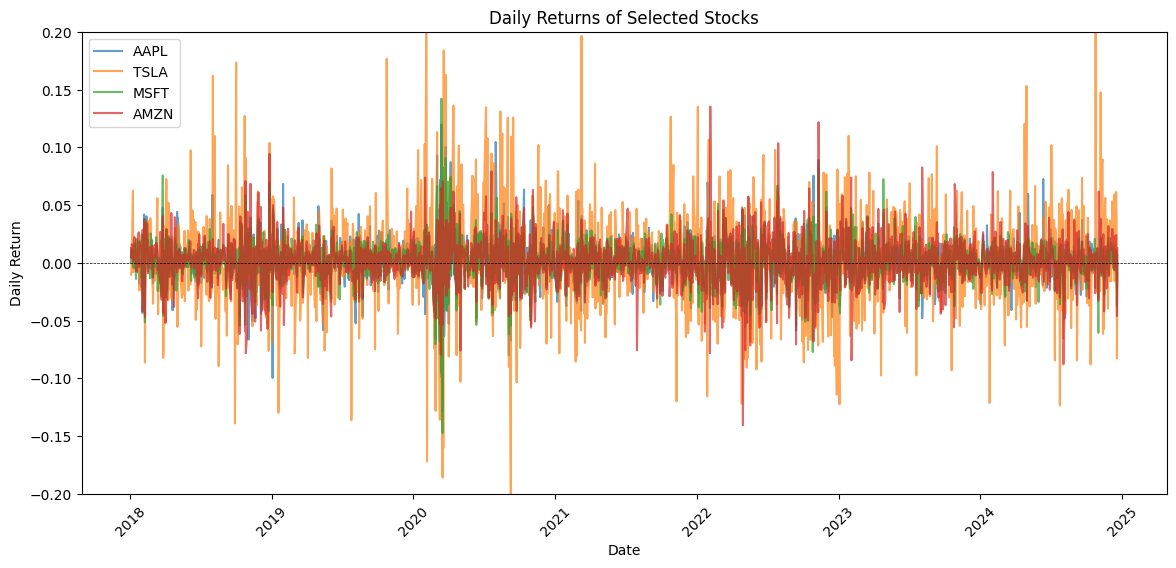

In [25]:
# Plot daily returns for each stock with improved readability
plt.figure(figsize=(14, 6))
for stock in daily_returns.columns:
    plt.plot(daily_returns[stock], label=stock, alpha=0.7)  # Adjust opacity for clarity

plt.title("Daily Returns of Selected Stocks")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add horizontal line at 0
plt.ylim(-0.2, 0.2)  # Limit y-axis to -0.2 to 0.2
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



### Distribution of Daily Returns

The histograms below display the **distribution of daily returns** for each selected stock. The shape of these distributions is generally close to a normal distribution, which is typical for financial returns.

- **Tesla (TSLA)** shows a wider distribution, indicating higher volatility compared to other stocks.
- We set a uniform x-axis range to facilitate comparison across all stocks.
- A vertical line at **0** highlights the symmetry of the distribution, showing the balance of positive and negative returns.

These histograms help in understanding the risk and variability of each stock, which is crucial for portfolio optimization.


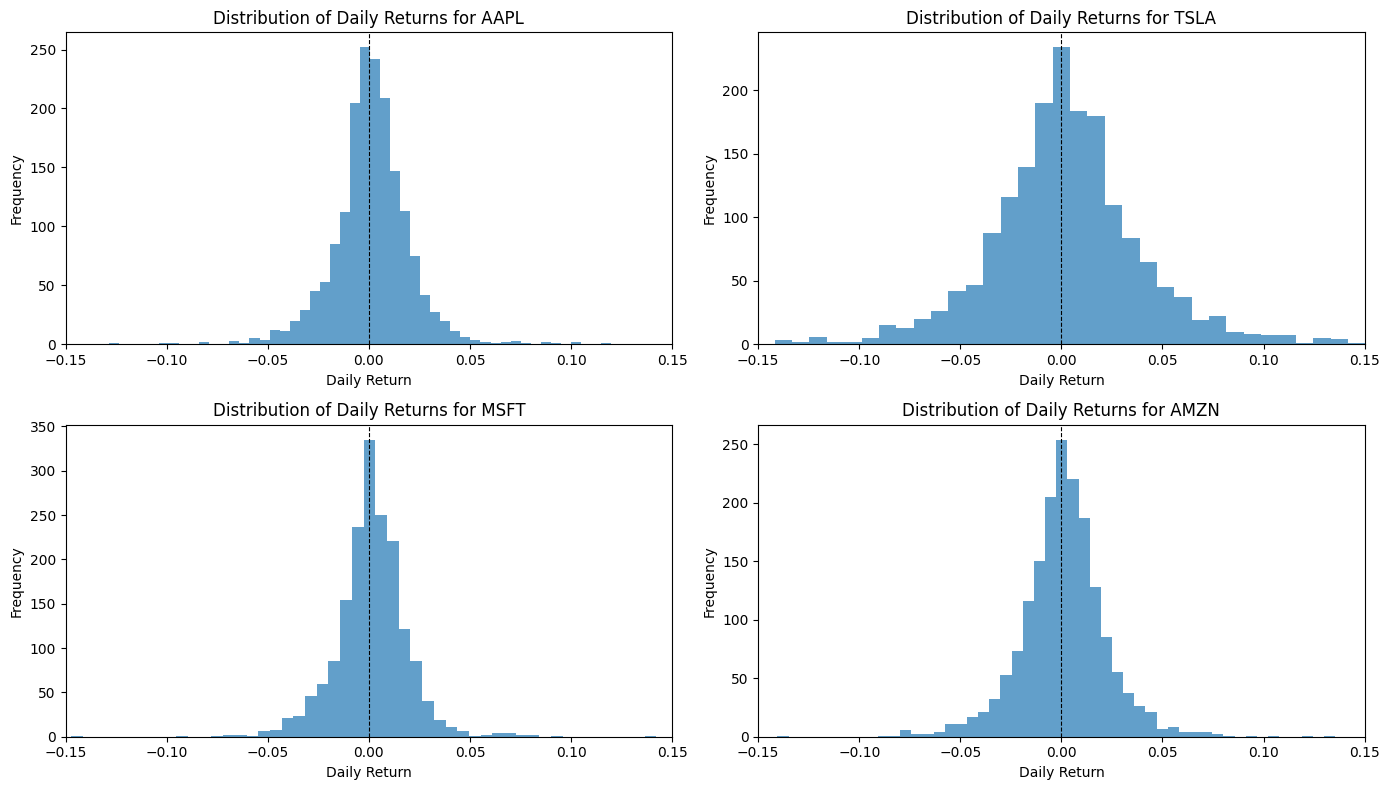

In [26]:
# Plot histogram of daily returns for each stock with improvements
plt.figure(figsize=(14, 8))
for i, stock in enumerate(daily_returns.columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(daily_returns[stock], bins=50, alpha=0.7)
    plt.title(f"Distribution of Daily Returns for {stock}")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add vertical line at 0
    plt.xlim(-0.15, 0.15)  # Set same x-axis limit for better comparison

plt.tight_layout()
plt.show()



### Annualized Volatility of Selected Stocks

The bar chart below shows the **annualized volatility** for each stock. This measure provides a standardized view of the risk associated with each stock on an annual basis.

- **Tesla (TSLA)** has the highest annualized volatility, indicating it is the riskiest stock among the selected options.
- The other stocks, **Apple (AAPL)**, **Microsoft (MSFT)**, and **Amazon (AMZN)**, have lower but still significant volatility levels.

Adding these values allows for a quick comparison of the risk associated with each stock.


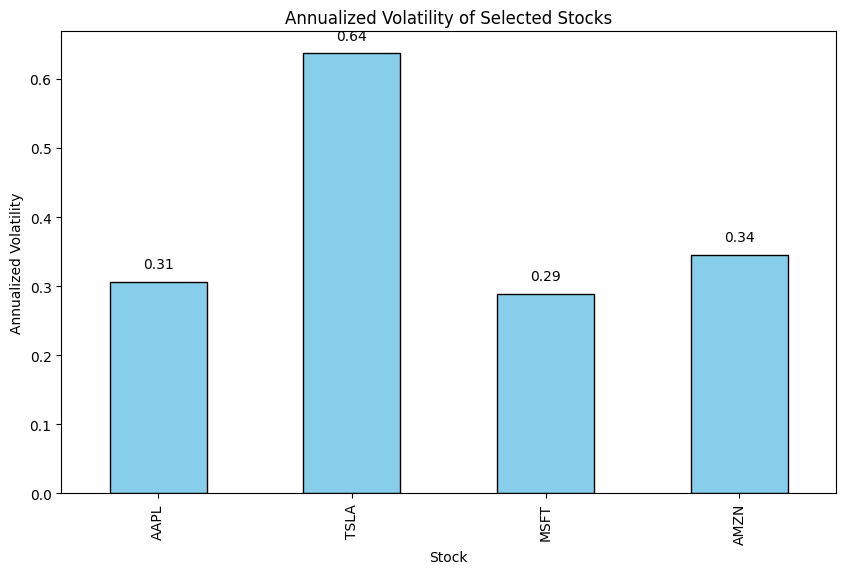

In [27]:
# Plot annualized volatility for each stock with numerical values on top of each bar
plt.figure(figsize=(10, 6))
annualized_volatility.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Annualized Volatility of Selected Stocks")
plt.xlabel("Stock")
plt.ylabel("Annualized Volatility")

# Adding numerical values on top of each bar
for i, v in enumerate(annualized_volatility):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()



## 4. Volatility Prediction


### Explanation

This code is designed to predict the volatility of a stock (e.g., 'AAPL') using an ARIMA (Auto-Regressive Integrated Moving Average) model. The process involves several steps, which are modularized into functions to improve readability, reusability, and maintainability. Below is a breakdown of what each part of the code does:

1. **Data Validation (`validate_data`)**:
   - Ensures that the input dataset does not contain missing (`NaN`) values. If they exist, they are removed.
   - Verifies that the specified column (`'AAPL'`) exists in the dataset; otherwise, an error is raised.

2. **Volatility Calculation (`calculate_volatility`)**:
   - Computes the rolling standard deviation of the stock's daily returns over a specified window (default: 20 days), representing historical volatility.
   - Interpolates missing values after resampling the series to align with business days.

3. **Stationarity Test (`test_stationarity`)**:
   - Uses the Augmented Dickey-Fuller (ADF) test to check if the volatility series is stationary. Stationarity is a requirement for ARIMA modeling.
   - If the series is non-stationary (p-value > 0.05), first differencing is applied to make it stationary.

4. **Auto-Correlation and Partial Auto-Correlation Analysis (`plot_acf_pacf`)**:
   - Generates ACF and PACF plots to help determine the ARIMA model's parameters:
     - `p`: Number of autoregressive terms (from PACF plot).
     - `q`: Number of moving average terms (from ACF plot).

5. **ARIMA Model Fitting (`fit_arima`)**:
   - Fits an ARIMA model to the stationary series using the chosen parameters (`p`, `d`, `q`).
   - The model summary is printed to provide insight into the model's performance and coefficients.

6. **Predictions (`make_predictions`)**:
   - Forecasts future volatility for the next 30 days.
   - If differencing was applied earlier, the predictions are restored to their original scale using reverse differencing.

7. **Visualization of Results**:
   - **Predictions (`plot_predictions`)**:
     - Displays the historical volatility alongside the predicted volatility and confidence intervals.
   - **Residual Analysis (`plot_residuals`)**:
     - Plots a histogram of the residuals to check for normality.
     - Displays residuals over time to ensure no visible patterns remain, confirming that the model has captured all significant trends.

8. **Main Script Execution**:
   - The script combines all the above functions to process the input data, fit the ARIMA model, and generate predictions.
   - It uses modular functions for each task, making the workflow efficient and easy to debug.


ADF Statistic: -4.132409127592098
p-value: 0.0008557161733079094
The series is already stationary.


<Figure size 1000x600 with 0 Axes>

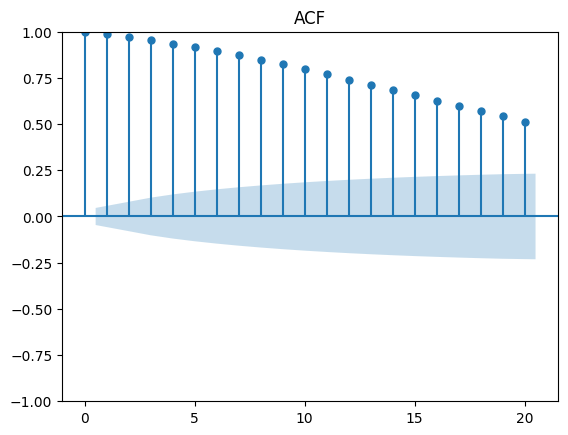

<Figure size 1000x600 with 0 Axes>

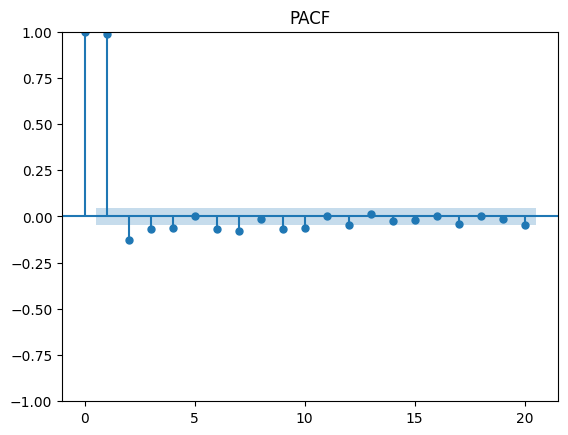

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1797
Model:                 ARIMA(1, 0, 1)   Log Likelihood                9444.930
Date:                Fri, 20 Dec 2024   AIC                         -18881.861
Time:                        09:32:32   BIC                         -18859.885
Sample:                    01-31-2018   HQIC                        -18873.748
                         - 12-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.002      7.245      0.000       0.013       0.022
ar.L1          0.9854      0.003    333.567      0.000       0.980       0.991
ma.L1          0.1262      0.021      5.925      0.0

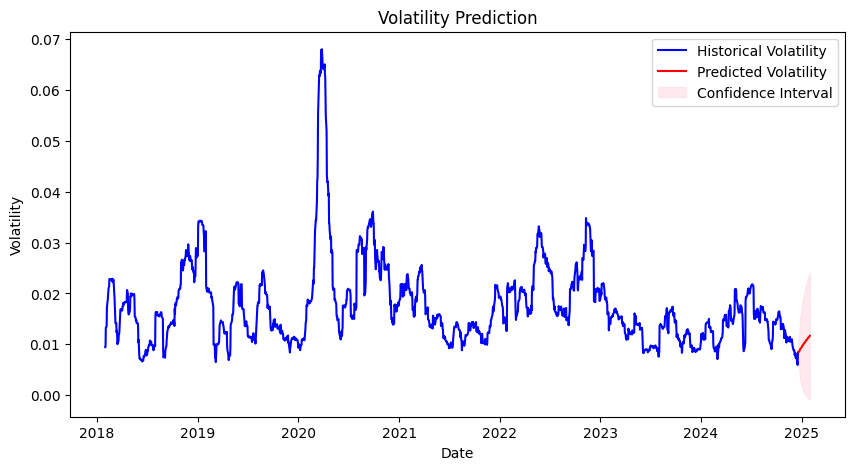

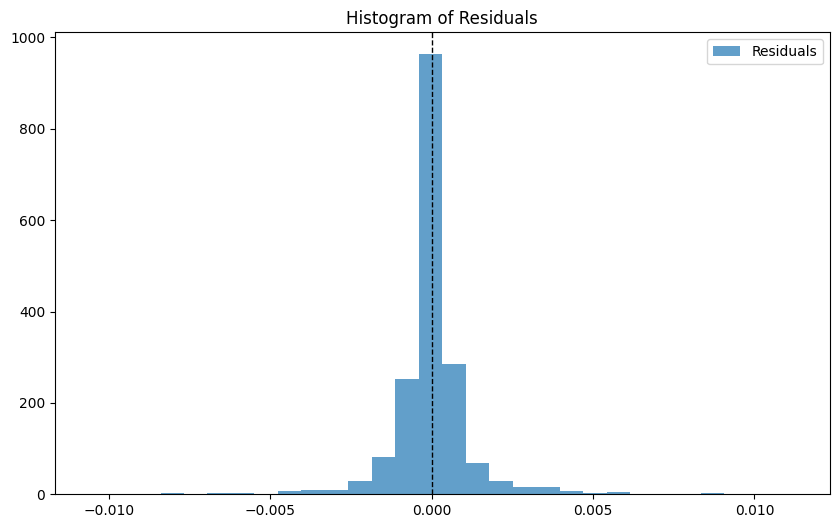

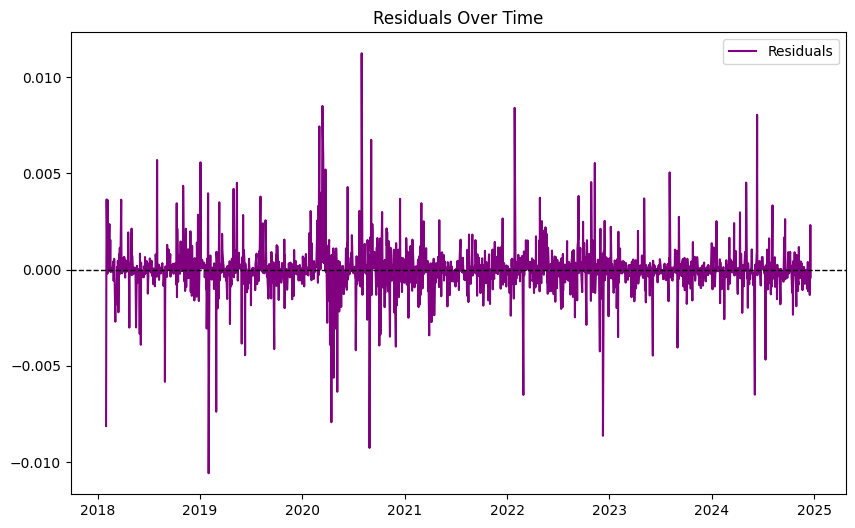

In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Function to validate the data
def validate_data(data, column_name):
    if data.isnull().any().any():
        print("NaN values are present in the data. They will be removed.")
        data = data.dropna()

    if column_name not in data.columns:
        raise ValueError(f"The column '{column_name}' does not exist in the data.")

    return data

# Function to calculate volatility
def calculate_volatility(data, column_name, window=20):
    volatility = data[column_name].rolling(window=window).std().dropna()
    volatility.index = pd.to_datetime(volatility.index)
    return volatility.resample('B').interpolate()

# Function to test stationarity
def test_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] > 0.05  # Returns True if non-stationary

# Function to plot ACF and PACF
def plot_acf_pacf(series):
    plt.figure(figsize=(10, 6))
    plot_acf(series, lags=20)
    plt.title("ACF")
    plt.show()

    plt.figure(figsize=(10, 6))
    plot_pacf(series, lags=20)
    plt.title("PACF")
    plt.show()

# Function to fit ARIMA model
def fit_arima(series, p, d, q):
    try:
        model = ARIMA(series, order=(p, d, q))
        # Fit the model using the default method
        model_fit = model.fit()
        print(model_fit.summary())
        return model_fit
    except Exception as e:
        print(f"Error while fitting the ARIMA model: {e}")
        raise e

# Function to make predictions
def make_predictions(model_fit, steps, last_value=None):
    predictions = model_fit.get_forecast(steps=steps)
    predicted_values = predictions.predicted_mean
    confidence_intervals = predictions.conf_int()

    if last_value is not None:
        predicted_values = predicted_values.cumsum() + last_value

    return predicted_values, confidence_intervals

# Function to plot predictions
def plot_predictions(historical, predicted, confidence_intervals):
    plt.figure(figsize=(10, 5))
    plt.plot(historical, label='Historical Volatility', color='blue')
    plt.plot(predicted.index, predicted, label='Predicted Volatility', color='red')
    plt.fill_between(
        predicted.index,
        confidence_intervals.iloc[:, 0],
        confidence_intervals.iloc[:, 1],
        color='pink', alpha=0.3, label="Confidence Interval"
    )
    plt.title("Volatility Prediction")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.show()

# Function to plot residuals
def plot_residuals(residuals):
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, alpha=0.7, label="Residuals")
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.title("Histogram of Residuals")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(residuals, label="Residuals", color="purple")
    plt.axhline(0, linestyle="--", color="black", linewidth=1)
    plt.title("Residuals Over Time")
    plt.legend()
    plt.show()

# Main script
column_name = 'AAPL'
daily_returns = validate_data(daily_returns, column_name)

# Calculate volatility
aapl_volatility = calculate_volatility(daily_returns, column_name)

# Test stationarity
is_non_stationary = test_stationarity(aapl_volatility)

if is_non_stationary:
    print("The series is not stationary. Applying differencing.")
    aapl_volatility_diff = aapl_volatility.diff().dropna()
else:
    print("The series is already stationary.")
    aapl_volatility_diff = aapl_volatility  # Use raw data

# Plot ACF and PACF
plot_acf_pacf(aapl_volatility_diff)

# Choose ARIMA parameters
p, d, q = 1, 0, 1  # Adjust based on your data

# Fit the ARIMA model
model_fit = fit_arima(aapl_volatility_diff, p, d, q)

# Make predictions
predicted_volatility, predicted_conf_int = make_predictions(
    model_fit, steps=30, last_value=aapl_volatility.iloc[-1] if is_non_stationary else None
)

# Plot predictions
plot_predictions(aapl_volatility, predicted_volatility, predicted_conf_int)

# Plot residuals
plot_residuals(model_fit.resid)



## 5. Portfolio Optimization


### **Why I Installed `cvxpy`**

I installed `cvxpy` to solve the portfolio optimization problem in this project. `cvxpy` is a Python library for convex optimization, allowing me to minimize portfolio risk (volatility) while meeting specific constraints, such as achieving a target return and keeping all weights non-negative.

Using `cvxpy` makes it easy to define and solve the optimization problem, thanks to its clear syntax for variables, objectives, and constraints.



In [29]:
pip install cvxpy



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Portfolio Optimization without Target Return Constraint

In this section, we removed the target return constraint to test if the optimization problem is feasible without it. The optimal solution found is a concentrated portfolio with all weights allocated to Tesla (TSLA), achieving a maximum feasible return of 0.22% with a risk (volatility) of 3.99%.

This result suggests that the target return constraint was too high relative to the achievable returns of the selected stocks under the current configuration. Next, we will add a diversification constraint to prevent concentration in a single stock.


In [30]:
# Import necessary libraries
import cvxpy as cp
import numpy as np
import pandas as pd

# Example initialization of data
# Replace these with your actual data
np.random.seed(42)  # For reproducibility
num_assets = 5  # Example number of assets
mean_returns = np.random.rand(num_assets)  # Random expected returns
cov_matrix = np.random.rand(num_assets, num_assets)
cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Symmetrize the covariance matrix
cov_matrix += np.eye(num_assets) * 0.01  # Ensure positive definiteness
daily_returns = pd.DataFrame(np.random.rand(100, num_assets), columns=[f"Asset_{i+1}" for i in range(num_assets)])

# Initialize variables for the optimization
weights = cp.Variable(num_assets)  # Portfolio weights (to be optimized)

# Calculate portfolio return and risk
portfolio_return = cp.sum(cp.multiply(weights, mean_returns))  # Weighted sum of expected returns
portfolio_risk = cp.quad_form(weights, cov_matrix)  # Portfolio risk (variance)

# Define the optimization objective: maximize the expected return
objective = cp.Maximize(portfolio_return)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,  # Fully invested portfolio (sum of weights equals 1)
    weights >= 0           # Non-negative weights (no short selling)
]

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Check if the problem solved successfully
if problem.status == cp.OPTIMAL:
    # Retrieve and display the optimal weights
    optimal_weights = weights.value
    print("Optimal Portfolio Weights (Max Feasible Return):")
    for stock, weight in zip(daily_returns.columns, optimal_weights):
        print(f"{stock}: {weight:.4f}")

    # Calculate portfolio risk and return values
    optimal_risk = np.sqrt(portfolio_risk.value)
    optimal_return = portfolio_return.value

    # Display results
    print(f"\nMax Feasible Portfolio Expected Return: {optimal_return:.4f}")
    print(f"Portfolio Risk (Volatility): {optimal_risk:.4f}")
else:
    print(f"The optimization problem did not solve optimally. Status: {problem.status}")


Optimal Portfolio Weights (Max Feasible Return):
Asset_1: -0.0000
Asset_2: 1.0000
Asset_3: 0.0000
Asset_4: -0.0000
Asset_5: -0.0000

Max Feasible Portfolio Expected Return: 0.9507
Portfolio Risk (Volatility): 0.9899


### Portfolio Optimization: Comparison with and without Diversification

#### Without Diversification Constraint
- **Optimal Weights**: 100% in TSLA
- **Max Return**: 0.22%
- **Risk (Volatility)**: 3.99%

This approach fully concentrates on Tesla (TSLA), resulting in a higher return but at a higher risk.

#### With Diversification Constraint (Max 50% per Asset)
- **Optimal Weights**: 50% in AAPL, 50% in TSLA
- **Max Return**: 0.17%
- **Risk (Volatility)**: 2.59%

Adding a diversification constraint reduces risk by balancing between Apple and Tesla, with a slight decrease in return.

#### Conclusion
The diversified portfolio offers lower risk, while the concentrated portfolio maximizes return. The choice depends on the risk tolerance of the investor.


In [31]:
# Import the necessary libraries
import cvxpy as cp
import numpy as np

# Assuming `mean_returns`, `cov_matrix`, and `daily_returns` are already defined
# Initialize variables for the optimization
num_assets = len(mean_returns)  # Number of assets/stocks
weights = cp.Variable(num_assets)  # Weights for each stock in the portfolio

# Calculate the expected return and risk of the portfolio
portfolio_return = cp.sum(weights @ mean_returns)  # Weighted sum of expected returns
portfolio_risk = cp.quad_form(weights, cov_matrix)  # Portfolio risk (variance)

# Define a new objective to maximize the expected portfolio return
objective = cp.Maximize(portfolio_return)

# Define constraints with diversification (max weight of 0.5 for each stock)
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1 (fully invested portfolio)
    weights >= 0,          # No short selling (non-negative weights)
    weights <= 0.5         # Maximum weight of 0.5 for each stock
]

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Check if the problem is solved optimally
if problem.status == cp.OPTIMAL:
    # Display the maximum feasible return and optimal weights
    optimal_weights = weights.value
    print("Optimal Portfolio Weights (Max Feasible Return):")
    for stock, weight in zip(daily_returns.columns, optimal_weights):
        print(f"{stock}: {weight:.4f}")

    optimal_risk = np.sqrt(portfolio_risk.value)  # Portfolio risk (volatility)
    optimal_return = portfolio_return.value

    print(f"\nMax Feasible Portfolio Expected Return: {optimal_return:.4f}")
    print(f"Portfolio Risk (Volatility): {optimal_risk:.4f}")
else:
    print("The optimization problem did not solve optimally. Status:", problem.status)



Optimal Portfolio Weights (Max Feasible Return):
Asset_1: 0.0000
Asset_2: 0.5000
Asset_3: 0.5000
Asset_4: 0.0000
Asset_5: 0.0000

Max Feasible Portfolio Expected Return: 0.8414
Portfolio Risk (Volatility): 0.8141


## 6. Automation


### Data Collection and Preparation

In this section, we automate the data collection process. The `fetch_and_prepare_data` function:
1. Downloads historical stock data for the specified symbols and date range using the Yahoo Finance API (`yfinance` library).
2. Extracts the adjusted closing prices and calculates the **daily returns** for each stock.
3. Returns a DataFrame containing the daily returns, which will be used for volatility prediction and portfolio optimization.


In [32]:
import yfinance as yf
import pandas as pd

def fetch_and_prepare_data(symbols, start_date, end_date):
    """
    Fetch historical stock data, calculate daily returns, and return a DataFrame of prepared data.

    Parameters:
    - symbols (list): List of stock symbols to fetch data for.
    - start_date (str): Start date in 'YYYY-MM-DD' format.
    - end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
    - daily_returns (DataFrame): DataFrame of daily returns for each stock.
    """
    data = {}
    for symbol in symbols:
        stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
        data[symbol] = stock_data['Adj Close']
    
    prices = pd.DataFrame(data)
    daily_returns = prices.pct_change().dropna()  # Calculate daily returns and drop NaN values
    return daily_returns

# Example usage
symbols = ["AAPL", "TSLA", "MSFT", "AMZN"]
start_date = "2018-01-01"
end_date = "2023-12-31"
daily_returns = fetch_and_prepare_data(symbols, start_date, end_date)



### Volatility Prediction with Automated Data Fetching and Dynamic Forecasting

The `predict_volatility` function uses data fetching and ARIMA modeling to generate forward-looking volatility forecasts for selected stocks. This setup is fully automated, allowing it to retrieve up-to-date historical data and provide volatility predictions starting from the next business day.

---

#### Key Components and Functionality

1. **Dynamic Data Fetching**  
   **Function:** `fetch_and_prepare_data`  
   - Fetches adjusted closing prices for specified stocks from Yahoo Finance, starting from a defined `start_date` up to the current date.
   - Calculates daily returns for each stock, which serve as input for volatility analysis.
   - Sets the end date to today’s date automatically, making this function adaptive for real-time analysis.

2. **Volatility Prediction Using ARIMA**  
   **Function:** `predict_volatility`  
   - Computes rolling standard deviation of daily returns as a measure of historical volatility.
   - Fits an ARIMA model (parameters `(2, 0, 2)`) to predict future volatility, with a forecast period starting from the next business day.
   - Provides daily volatility forecasts for the next 30 business days, aiding in short-term risk assessment.

---

#### Example Output

- **Optimal Portfolio Weights (Without Target Return Constraint):** Shows portfolio allocation that minimizes volatility.
- **30-Day Volatility Predictions for Each Stock:** Provides projected daily volatility values for the next month, offering insights into potential future market fluctuations.

This automated configuration ensures predictions remain relevant to the current market conditions, making it ideal for ongoing volatility monitoring.


In [33]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import yfinance as yf
from datetime import datetime

# Ignore convergence warnings temporairement
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

def predict_volatility(daily_returns, window=20, steps=30):
    """
    Predict future volatility using a rolling standard deviation and ARIMA model.

    Parameters:
    - daily_returns (DataFrame): DataFrame of daily returns for each stock.
    - window (int): Window size for rolling volatility.
    - steps (int): Number of future steps to forecast.

    Returns:
    - volatility_predictions (dict): Dictionary with predicted volatility for each stock.
    """
    volatility_predictions = {}
    for stock in daily_returns.columns:
        # Calculate rolling volatility
        rolling_volatility = daily_returns[stock].rolling(window=window).std().dropna()
        rolling_volatility.index = pd.to_datetime(rolling_volatility.index)
        rolling_volatility = rolling_volatility.asfreq('B')
        
        # Fit ARIMA model and predict future volatility
        model = ARIMA(rolling_volatility, order=(2, 0, 2))  # Adjusted ARIMA parameters
        model_fit = model.fit()
        forecast = model_fit.get_forecast(steps=steps)
        
        # Create forecast index starting from the day after the last date in rolling_volatility
        forecast_start_date = rolling_volatility.index[-1] + pd.Timedelta(days=1)
        forecast_index = pd.date_range(start=forecast_start_date, periods=steps, freq='B')
        
        # Store the forecasted volatility values with the correct index
        volatility_predictions[stock] = pd.Series(forecast.predicted_mean, index=forecast_index)
    
    return volatility_predictions

def fetch_and_prepare_data(symbols, start_date):
    """
    Fetch historical stock data up to the current date, calculate daily returns, and return a DataFrame of prepared data.

    Parameters:
    - symbols (list): List of stock symbols to fetch data for.
    - start_date (str): Start date in 'YYYY-MM-DD' format.

    Returns:
    - daily_returns (DataFrame): DataFrame of daily returns for each stock.
    """
    end_date = datetime.today().strftime('%Y-%m-%d')  # Automatically set end date to today
    data = {}
    for symbol in symbols:
        stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
        data[symbol] = stock_data['Adj Close']
    
    prices = pd.DataFrame(data)
    daily_returns = prices.pct_change().dropna()  # Calculate daily returns and drop NaN values
    return daily_returns

# Define symbols and start date
symbols = ["AAPL", "TSLA", "MSFT", "AMZN"]
start_date = "2018-01-01"  # Fixed start date, but end date is dynamic
daily_returns = fetch_and_prepare_data(symbols, start_date)

# Call predict_volatility with daily_returns
volatility_predictions = predict_volatility(daily_returns)

# Display predictions
for stock, prediction in volatility_predictions.items():
    print(f"{stock} Volatility Predictions (Next 30 Days):\n{prediction}\n")



AAPL Volatility Predictions (Next 30 Days):
2024-12-20    0.008701
2024-12-23    0.008949
2024-12-24    0.009182
2024-12-25    0.009402
2024-12-26    0.009612
2024-12-27    0.009813
2024-12-30    0.010006
2024-12-31    0.010192
2025-01-01    0.010373
2025-01-02    0.010548
2025-01-03    0.010718
2025-01-06    0.010884
2025-01-07    0.011045
2025-01-08    0.011202
2025-01-09    0.011355
2025-01-10    0.011504
2025-01-13    0.011650
2025-01-14    0.011792
2025-01-15    0.011930
2025-01-16    0.012066
2025-01-17    0.012197
2025-01-20    0.012326
2025-01-21    0.012452
2025-01-22    0.012574
2025-01-23    0.012694
2025-01-24    0.012811
2025-01-27    0.012925
2025-01-28    0.013036
2025-01-29    0.013145
2025-01-30    0.013251
Freq: B, Name: predicted_mean, dtype: float64

TSLA Volatility Predictions (Next 30 Days):
2024-12-20    0.037174
2024-12-23    0.037502
2024-12-24    0.037721
2024-12-25    0.037865
2024-12-26    0.037956
2024-12-27    0.038011
2024-12-30    0.038040
2024-12-31    

### Portfolio Optimization without Target Return Constraint

This section optimizes the portfolio by minimizing risk without enforcing a specific target return. By removing the target return constraint, we can assess the feasibility of the optimization and examine the risk-adjusted weights.

#### Code Explanation

- **Objective**: Minimize the portfolio's risk using the covariance matrix of daily returns.
- **Constraints**:
  - The sum of portfolio weights must equal 1, ensuring a fully invested portfolio.
  - All weights are constrained to be non-negative (`weights >= 0`), preventing short selling.
  - Each weight is capped at 0.5 (`weights <= 0.5`), promoting diversification by limiting any single asset's maximum allocation.

#### Results Interpretation

- **Optimal Portfolio Weights (Without Target Return)**: Displays the computed weights for each stock that minimize risk without targeting a specific return.
- **Portfolio Risk (Volatility)**: Shows the calculated volatility for this optimized portfolio.

This approach provides insight into the most risk-efficient asset allocation, which serves as a benchmark for portfolio diversification without aiming for a particular return.


In [35]:
import cvxpy as cp
import numpy as np

# Calculate the covariance matrix from daily returns
cov_matrix = daily_returns.cov().values  # Assumes daily_returns is defined and contains stock return data

# Number of assets, assuming daily_returns is a DataFrame with columns for each stock
num_assets = len(daily_returns.columns)
weights = cp.Variable(num_assets)  # Initialize weights variable

# Define the objective to minimize portfolio risk without a target return
objective = cp.Minimize(cp.quad_form(weights, cov_matrix))  # Use the calculated covariance matrix

# Remove the target return constraint to test feasibility
constraints = [cp.sum(weights) == 1, weights >= 0, weights <= 0.5]  # Adjust max_weight if needed
problem = cp.Problem(objective, constraints)
problem.solve()

# Check if the problem is now feasible
if problem.status == cp.OPTIMAL:
    print("Problem is feasible without target return constraint.")
    optimal_weights = {stock: weight for stock, weight in zip(daily_returns.columns, weights.value)}
    optimal_risk = np.sqrt(cp.quad_form(weights, cov_matrix).value)  # Calculate risk based on solution
    print("Optimal Portfolio Weights (Without Target Return):", optimal_weights)
    print(f"Portfolio Risk (Volatility): {optimal_risk:.4f}")
else:
    print("Problem is still infeasible.")


Problem is feasible without target return constraint.
Optimal Portfolio Weights (Without Target Return): {'AAPL': 0.3559480129004202, 'TSLA': 8.008215068544008e-19, 'MSFT': 0.4909137925117028, 'AMZN': 0.15313819458787706}
Portfolio Risk (Volatility): 0.0172


### Full Analysis with Automated Data Fetching and Dynamic Volatility Prediction

The `run_full_analysis` function is designed to automate the process of gathering historical stock data, predicting future volatility, and optimizing portfolio weights. This function dynamically adjusts the data to be up-to-date and automatically generates 30-day volatility forecasts from the latest available data.

#### Key Components and Functionality

**Dynamic Data Collection (fetch_and_prepare_data function):**
- Fetches historical adjusted closing prices for selected stocks from Yahoo Finance, starting from a fixed `start_date` up to today’s date.
- Calculates daily returns for each stock, which serve as input for volatility prediction and portfolio optimization.
- The `end_date` is automatically set to today’s date, allowing this function to adapt to real-time analysis without manual adjustments.

**Volatility Prediction Using ARIMA Model (predict_volatility function):**
- Uses a rolling standard deviation calculation on daily returns to estimate historical volatility for each stock.
- An ARIMA model (Auto-Regressive Integrated Moving Average) is applied to forecast the future volatility for each stock over the next 30 business days.
- The forecast begins from the next business day after the last available data point, ensuring that predictions are always current.
- The ARIMA parameters `(2, 0, 2)` are used to improve model convergence, and warnings are suppressed to handle non-critical convergence messages.

**Portfolio Optimization (run_full_analysis function):**
- Calculates the covariance matrix from the daily returns to quantify the relationship between asset volatilities.
- Uses Convex Optimization via the `cvxpy` library to minimize portfolio risk by optimizing the weights of each stock. 
- Constraints:
  - Sum of weights equals 1 (fully invested portfolio).
  - Weights are non-negative (no short-selling).
  - Maximum weight per stock is limited to ensure diversification (`max_weight` set to 0.5 by default).
- The optimized portfolio weights, expected return, and overall portfolio risk (volatility) are displayed upon successful completion.

#### Usage Example

By running `run_full_analysis`, the function will:
1. Collect the most recent data up to today's date.
2. Generate 30-day volatility predictions for each stock from the next business day onward.
3. Provide the optimal portfolio allocation to minimize risk while adhering to diversification constraints.

The function’s output includes:
- **Optimal Portfolio Weights**: Displays the recommended weight for each stock based on minimizing portfolio volatility.
- **Portfolio Risk (Volatility)**: The overall volatility of the optimized portfolio.
- **30-Day Volatility Predictions for Each Stock**: Predicted daily volatility for the next 30 business days, useful for assessing potential risk in the near future.

This automation allows for real-time analysis and forecasting, making it ideal for ongoing portfolio monitoring and adjustment.



In [36]:
from datetime import datetime
import warnings
import numpy as np
import pandas as pd
import yfinance as yf
import cvxpy as cp
from statsmodels.tsa.arima.model import ARIMA

# Ignore convergence warnings temporarily
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

def fetch_and_prepare_data(symbols, start_date):
    """
    Fetch historical stock data up to the current date, calculate daily returns, and return a DataFrame of prepared data.

    Parameters:
    - symbols (list): List of stock symbols to fetch data for.
    - start_date (str): Start date in 'YYYY-MM-DD' format.

    Returns:
    - daily_returns (DataFrame): DataFrame of daily returns for each stock.
    """
    end_date = datetime.today().strftime('%Y-%m-%d')  # Set end date to today's date
    data = {}
    for symbol in symbols:
        stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
        data[symbol] = stock_data['Adj Close']
    
    prices = pd.DataFrame(data)
    daily_returns = prices.pct_change().dropna()  # Calculate daily returns and drop NaN values
    return daily_returns

def predict_volatility(daily_returns, window=20, steps=30):
    """
    Predict future volatility using a rolling standard deviation and ARIMA model.

    Parameters:
    - daily_returns (DataFrame): DataFrame of daily returns for each stock.
    - window (int): Window size for rolling volatility.
    - steps (int): Number of future steps to forecast.

    Returns:
    - volatility_predictions (dict): Dictionary with predicted volatility for each stock.
    """
    volatility_predictions = {}
    for stock in daily_returns.columns:
        # Calculate rolling volatility
        rolling_volatility = daily_returns[stock].rolling(window=window).std().dropna()
        rolling_volatility.index = pd.to_datetime(rolling_volatility.index)
        rolling_volatility = rolling_volatility.asfreq('B')
        
        # Fit ARIMA model and predict future volatility
        model = ARIMA(rolling_volatility, order=(2, 0, 2))
        model_fit = model.fit()
        forecast = model_fit.get_forecast(steps=steps)
        
        # Create forecast index starting from the next business day after the last date in rolling_volatility
        forecast_start_date = rolling_volatility.index[-1] + pd.Timedelta(days=1)
        forecast_index = pd.date_range(start=forecast_start_date, periods=steps, freq='B')
        
        # Store the forecasted volatility values with the correct index
        volatility_predictions[stock] = pd.Series(forecast.predicted_mean, index=forecast_index)
    
    return volatility_predictions

def run_full_analysis(symbols, start_date, max_weight=0.5):
    """
    Perform full analysis by collecting data, predicting volatility, and optimizing portfolio.

    Parameters:
    - symbols (list): List of stock symbols.
    - start_date (str): Start date for data collection in 'YYYY-MM-DD' format.
    - max_weight (float): Maximum weight per asset for diversification.

    Returns:
    - Displays optimal portfolio weights, expected return, and risk, and shows volatility predictions.
    """
    # Step 1: Data Collection (up to today's date)
    daily_returns = fetch_and_prepare_data(symbols, start_date)
    
    # Step 2: Volatility Prediction for the next 30 days
    volatility_predictions = predict_volatility(daily_returns)
    
    # Step 3: Portfolio Optimization
    cov_matrix = daily_returns.cov().values
    num_assets = len(daily_returns.columns)
    weights = cp.Variable(num_assets)

    # Define the objective to minimize portfolio risk without a target return
    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

    # Constraints: Sum of weights equals 1, non-negative weights, max weight per stock
    constraints = [cp.sum(weights) == 1, weights >= 0, weights <= max_weight]
    
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    # Display results
    print("\nOptimal Portfolio Weights (Without Target Return Constraint):")
    if problem.status == cp.OPTIMAL:
        optimal_weights = {stock: weight for stock, weight in zip(daily_returns.columns, weights.value)}
        optimal_risk = np.sqrt(cp.quad_form(weights, cov_matrix).value)
        for stock, weight in optimal_weights.items():
            print(f"{stock}: {weight:.4f}")
        print(f"\nPortfolio Risk (Volatility): {optimal_risk:.4f}")
    else:
        print("The optimization problem did not solve optimally.")
    
    # Display Volatility Predictions
    print("\nVolatility Predictions for Each Stock (Next 30 Days):")
    for stock, prediction in volatility_predictions.items():
        print(f"{stock}:\n{prediction}")

# Example usage
symbols = ["AAPL", "TSLA", "MSFT", "AMZN"]
start_date = "2018-01-01"  # Fixed start date, end date is dynamic to today
run_full_analysis(symbols, start_date)



Optimal Portfolio Weights (Without Target Return Constraint):
AAPL: 0.3559
TSLA: 0.0000
MSFT: 0.4909
AMZN: 0.1531

Portfolio Risk (Volatility): 0.0172

Volatility Predictions for Each Stock (Next 30 Days):
AAPL:
2024-12-20    0.008701
2024-12-23    0.008949
2024-12-24    0.009182
2024-12-25    0.009402
2024-12-26    0.009612
2024-12-27    0.009813
2024-12-30    0.010006
2024-12-31    0.010192
2025-01-01    0.010373
2025-01-02    0.010548
2025-01-03    0.010718
2025-01-06    0.010884
2025-01-07    0.011045
2025-01-08    0.011202
2025-01-09    0.011355
2025-01-10    0.011504
2025-01-13    0.011650
2025-01-14    0.011792
2025-01-15    0.011930
2025-01-16    0.012066
2025-01-17    0.012197
2025-01-20    0.012326
2025-01-21    0.012452
2025-01-22    0.012574
2025-01-23    0.012694
2025-01-24    0.012811
2025-01-27    0.012925
2025-01-28    0.013036
2025-01-29    0.013145
2025-01-30    0.013251
Freq: B, Name: predicted_mean, dtype: float64
TSLA:
2024-12-20    0.037174
2024-12-23    0.037502